In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import re
import string


#accessing the data
data_quora = pd.read_csv("../input/traincsv/train.csv")
data_test = pd.read_csv("../input/testcsv/test.csv")
np.random.seed(0) 
print(data_quora.head())
print(data_test.head())

                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
                    qid                                      question_text
0  0000163e3ea7c7a74cd7  Why do so many women become so rude and arroga...
1  00002bd4fb5d505b9161  When should I apply for RV college of engineer...
2  00007756b4a147d2b0b3  What is it really like to be a nurse practitio...
3  000086e4b7e1c7146103                             Who are entrepreneurs?
4  0000c4c3fbe8785a3090   Is education really making good people nowadays?


In [2]:
#checking for missing values 
missing_values_count = data_quora.isnull().sum()
for i in missing_values_count:
    print(missing_values_count)

#total cells and missing cells
total_cells = np.product(data_quora.shape)
print(total_cells)
total_missing = missing_values_count.sum()
print(total_missing)
#none are missing

qid              0
question_text    0
target           0
dtype: int64
qid              0
question_text    0
target           0
dtype: int64
qid              0
question_text    0
target           0
dtype: int64
3918366
0


15.16287588169781


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


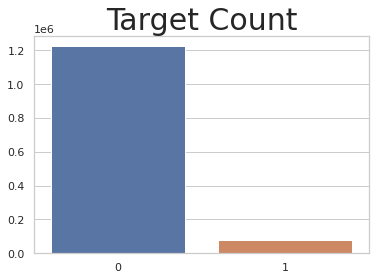

In [3]:
#some graphical representation
value = data_quora['target'].value_counts()

sns.set_theme(style="whitegrid")

ax = sns.barplot(value.index, value.values, data=data_quora)

ax.set_title('Target Count', fontsize=30)

sizes = (np.array((value / value.sum())*100))
labels = (np.array(value.index))

ratio = sizes[0]/sizes[1]
print(ratio)

plt.show()

In [4]:
data_quora['question_text']=data_quora['question_text'].apply(lambda x: x.lower())
data_test['question_text']=data_test['question_text'].apply(lambda x: x.lower())

#removing digits
data_quora['question_text']=data_quora['question_text'].apply(lambda x: re.sub('\w*\d\w*','', x))
data_test['question_text']=data_test['question_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#removing punctutations
data_quora['question_text']=data_quora['question_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
data_test['question_text']=data_test['question_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

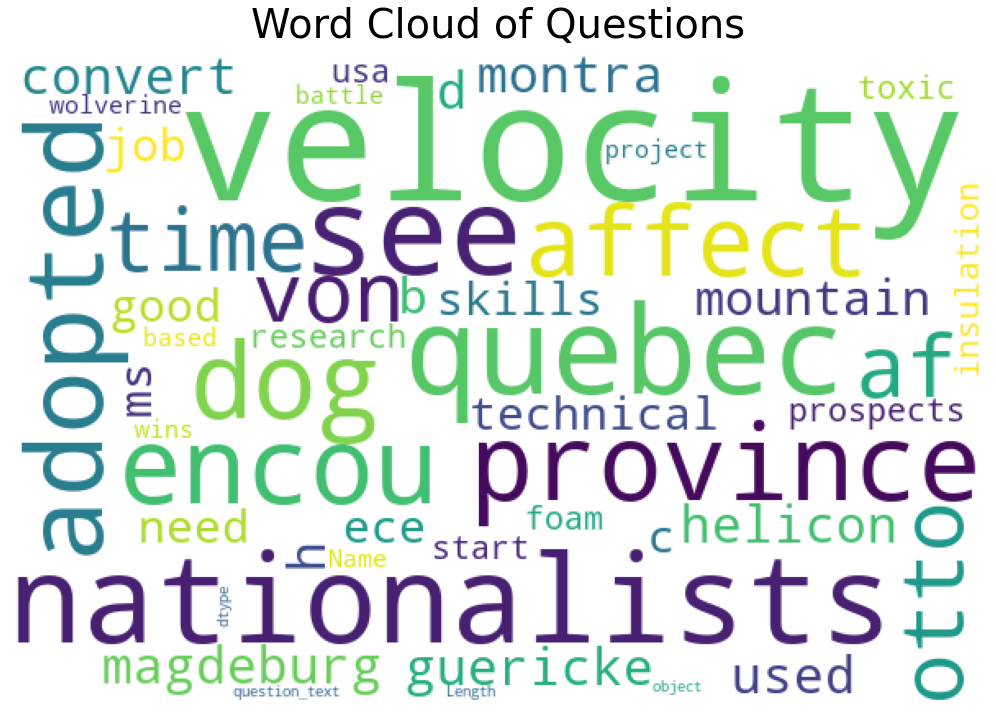

In [5]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud.color_from_image import ImageColorGenerator

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(14.0,14.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'po', 'th', 'sayi', 'fo', 'unknown','shall','may','what'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=600, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
    plt.savefig('wordcloud_quora_questions.png', dpi=300)
    plt.show()

# input for the function 
plot_wordcloud(data_quora["question_text"], title="Word Cloud of Questions")

In [6]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk_stopwords = stopwords.words('english')

wordnet_lemmatizer = WordNetLemmatizer()

def lemSentence(sentence):
    token_words = word_tokenize(sentence)
    lem_sentence = []
    for word in token_words:
        lem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lem_sentence.append(" ")
    return "".join(lem_sentence)

def clean(message, lem=True):
    
    message = [word for word in word_tokenize(message) if not word.lower() in nltk_stopwords]
    message = ' '.join(message)
    
    if lem:
        message = lemSentence(message)
    
    return message

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data_quora['question_text_cleaned'] = data_quora.question_text.apply(lambda x: clean(x, True))

In [8]:
print(data_quora.head())
print(data_quora.info())
print(data_quora.describe().T)

                    qid                                      question_text  \
0  00002165364db923c7e6  how did quebec nationalists see their province...   
1  000032939017120e6e44  do you have an adopted dog how would you encou...   
2  0000412ca6e4628ce2cf  why does velocity affect time does velocity af...   
3  000042bf85aa498cd78e  how did otto von guericke used the magdeburg h...   
4  0000455dfa3e01eae3af  can i convert montra helicon d to a mountain b...   

   target                              question_text_cleaned  
0       0           quebec nationalists see province nation   
1       0       adopt dog would encourage people adopt shop   
2       0  velocity affect time velocity affect space geo...  
3       0       otto von guericke use magdeburg hemispheres   
4       0  convert montra helicon mountain bike change ty...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 4 columns):
 #   Column                 Non-Null Coun

<AxesSubplot:xlabel='frequency', ylabel='word_sincere'>

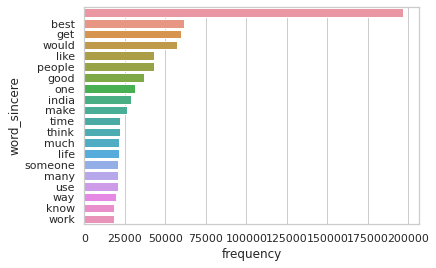

In [9]:
class Vocabulary(object):
    
    def __init__(self):
        self.vocab = {}
        self.STOPWORDS = set()
        self.STOPWORDS = set(stopwords.words('english'))
        
    def build_vocab(self, lines):
        for line in lines:
            for word in line.split(' '):
                word = word.lower()
                if (word in self.STOPWORDS):
                    continue
                if (word not in self.vocab):
                    self.vocab[word] = 0
                self.vocab[word] +=1 
    
    def generate_ngrams(text, n_gram=1):
        """arg: text, n_gram"""
        token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
        ngrams = zip(*[token[i:] for i in range(n_gram)])
        return [" ".join(ngram) for ngram in ngrams]
    
    def horizontal_bar_chart(df, color):
        trace = go.Bar(
            y=df["word"].values[::-1],
            x=df["wordcount"].values[::-1],
            showlegend=False,
            orientation = 'h',
            marker=dict(
            color=color,
            ),
        )
        return trace
    
sincere_vocab = Vocabulary()
sincere_vocab.build_vocab(data_quora[data_quora['target'] == 0]['question_text'])
sincere_vocabulary = sorted(sincere_vocab.vocab.items(), reverse=True, key=lambda kv: kv[1])
    
df_sincere_vocab = pd.DataFrame(sincere_vocabulary, columns=['word_sincere', 'frequency'])
sns.barplot(y='word_sincere', x='frequency', data=df_sincere_vocab[:20])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_quora['question_text_cleaned'], data_quora['target'], test_size=0.50, random_state=1)

In [11]:
#without weights
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
model = XGBClassifier()

vectorize_model_pipeline = Pipeline([
    ('count_vectorizer', count_vectorizer),
    ('model', model)])
vectorize_model_pipeline.fit(X_train, y_train)
predictions = vectorize_model_pipeline.predict(X_test)

print("Without Weights")
print('Accuracy :', accuracy_score(y_test, predictions))
print('Accuracy %:', (accuracy_score(y_test, predictions))*100)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Without Weights
Accuracy : 0.948110513412989
Accuracy %: 94.8110513412989


In [12]:
#With Weights
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
model = XGBClassifier(scale_pos_weight=ratio)

vectorize_model_pipeline = Pipeline([
    ('count_vectorizer', count_vectorizer),
    ('model', model)])
vectorize_model_pipeline.fit(X_train, y_train)
predictions = vectorize_model_pipeline.predict(X_test)

print("With Weights")
print('Accuracy :', accuracy_score(y_test, predictions))
print('Accuracy %:', (accuracy_score(y_test, predictions))*100)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
With Weights
Accuracy : 0.8893625557183785
Accuracy %: 88.93625557183785
